In [157]:
############################
# Importing required files
###########################
import matplotlib.pyplot as plt
#%matplotlib inline
import csv
import pandas as pd
import numpy as np
import random
 
plt.style.use('ggplot')

In [158]:
# Read Input files
city_csv = pd.read_csv("city_data.csv") 
ride_csv = pd.read_csv("ride_data.csv") 

print(len(city_csv))
city_csv.head()
 

125


,city,driver_count,type
0,Kelseyland,0,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [159]:
city_csv.loc[city_csv.city == "Alvarezhaven"]

,city,driver_count,type
65,Alvarezhaven,21,Urban


In [160]:
print(len(ride_csv))
ride_csv.head() 

2375


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [161]:
ride_csv.loc[ride_csv.city == "Sarabury"].fare.mean()

23.490000000000002

In [162]:
#merged both the input files to get driver_count and type added to "ride_data.csv"

data_df = pd.merge(ride_csv, city_csv, on="city") # myout.cvs
data_df.head()
#len(data_df) 

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [128]:
my_data_df = city_csv
#my_data_df.head

 

In [129]:
# Write CSV in R
my_data_df.to_csv('./myout.csv') 
 

In [130]:
x = data_df.groupby('city')['ride_id'].count() 


In [131]:
# Total Number of Rides (Per City) for x-axis plot
x = data_df.groupby('city')['ride_id'].count()

# Average Fare($)(per City) for y-axis plot
y = data_df.groupby('city')['fare'].mean()

# Num of drivers (per City) for z-axis (third dimention/3-d for bubble plot) from "city_data.csv"
# z = city_csv['driver_count']*10 # marker size of the bubble 

#z = data_df.groupby('city')['driver_count'].count()
# z
# city_csv.head()
# pd.Series(city_csv['driver_count'])


In [132]:

#Adding my data(x, y, x, c) for plotting the bubble 
#to the existing dataframe my_data_df with respective series data.

color_schema = (lambda x: "lightcoral" if x=="Urban" else ("lightskyblue" if x=="Suburban" else "gold"))

my_data_df['Total_#_of_rides'] = pd.Series(x).values
my_data_df['Average_Fare'] = pd.Series(y).values 
# my_data_df['correlate_w_circle_size'] = pd.Series(z).values
my_data_df['Coloring'] = my_data_df.type.apply(color_schema) 
#my_data_df

#ordersort = my_data_df.sort_values('city', ascending = True).head()
#ordersort

#my_data_df = pd.concat([x, y, z], axis=1).reset_index()
#my_data_df

In [154]:
def get_number_of_drivers(city):
    return city_csv.loc[city_csv.city == city].driver_count.values[0]
    
# get_number_of_drivers("Hernandezshire")
def get_city_type(city):
    return city_csv.loc[city_csv.city == city].type.values[0]
get_city_type("Hernandezshire")

def color_schema(x):
    col = ""
    if x=="Urban":
        col = "lightcoral"       
    elif x=="Suburban":
        col = "lightskyblue" 
    elif x=="Rural": 
        col = "gold"
    return col


In [155]:

# new_df.apply(new_df.in)
#new_df.index
z = pd.Series(z.index, index=z.index).apply(get_number_of_drivers)
city_type = pd.Series(z.index, index=z.index).apply(get_city_type)
color = pd.Series(city_type, index=z.index).apply(color_schema)
new_df = pd.concat([x,y,z,city_type, color], keys=["number_of_rides", "avg_fare", "driver_count", "type", "color"] , axis=1)

# new_df.concat([z], axis=1)
new_df.head()


,number_of_rides,avg_fare,driver_count,type,color
city,,,,,
Alvarezhaven,31,23.928710,21,Urban,lightcoral
Alyssaberg,26,20.609615,67,Urban,lightcoral
Anitamouth,9,37.315556,16,Suburban,lightskyblue
Antoniomouth,22,23.625000,21,Urban,lightcoral
Aprilchester,19,21.981579,49,Urban,lightcoral


In [156]:
# This is my data frame generated with all the above data
#arr = my_data_df['driver_count']
#arr[0:125]
#arr = arr.tolist()


In [144]:
# Create labels for the X and Y axis in the scatter, 3-d plot (can consider 4 as color is another variation)
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig.suptitle
plt.title("Pyber Ride Sharing Data (2016)",fontsize=16, fontweight="bold" )
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)") 
 
# Create a handle for each plot
 
# Tell matplotlib to create a scatter plot based upon the above data
ax.scatter(x=new_df['number_of_rides'], 
           y=new_df['avg_fare'], 
           s=new_df['driver_count']*10, 
           c=new_df['color'], 
           alpha=0.4, linewidths=2, edgecolor="black", label = "Urban")


# Set our legend to where the "Upper right" 
plt.legend(loc="upper right", title="City Types", fancybox=True)

plt.figtext(.90, .54, "Note:", rotation='horizontal')
plt.figtext(.90, .52, "Circle size correlates with driver count per city.", rotation='horizontal')

#plt.xlim(0, 40)
#plt.ylim(15, 55)
 


Text(0.9,0.52,'Circle size correlates with driver count per city.')

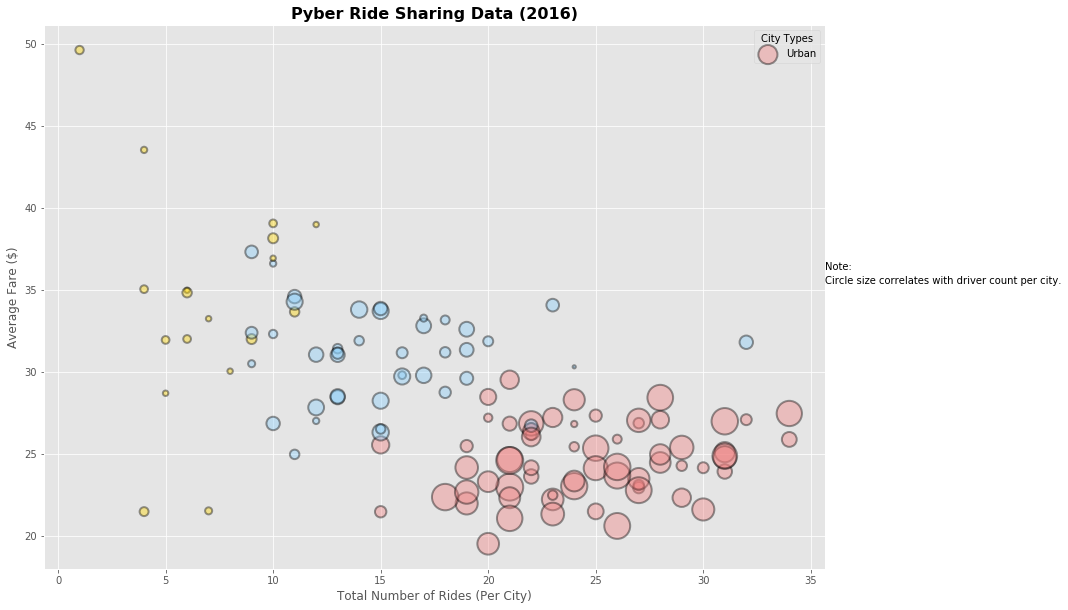

In [145]:
# Save and bubble plot
plt.savefig("Pyber_Ride_Sharing.png")
plt.show()


In [42]:
################################
# % of Total fares by city type
################################
city_fare = data_df.groupby(['type'])['fare'].sum()
#city_fare.loc['Rural']

total_fare = city_fare.sum()
 
fare_percentage = round(((city_fare/total_fare)*100),2)
 

# Labels for the sections of our pie chart
labels = ["Urban","Suburban", "Rural"]

# The values of each section of the pie chart
sizefare = [fare_percentage['Urban'], fare_percentage['Suburban'], fare_percentage['Rural'] ]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0, 0)
 

In [43]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Fares by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.pie(sizefare, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x10f7c78d0>,
 [Text(-0.34391,-1.14966,'Urban'),
  Text(0.527875,0.965064,'Suburban'),
  Text(-0.676864,0.867095,'Rural')],
 [Text(-0.200614,-0.670637,'63.0%'),
  Text(0.287932,0.526398,'30.3%'),
  Text(-0.369199,0.472961,'6.7%')])

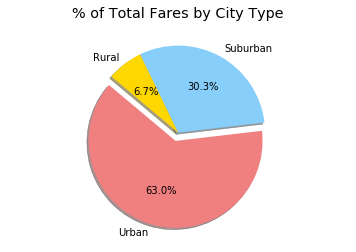

In [44]:
# Save and display the chart

plt.savefig("Total_Fares_by_City_Type.png")
plt.show()

In [45]:
################################
# % of Total rides per city type
################################
city_ride = data_df.groupby(['type'])['ride_id'].count()

total_ride = city_ride.sum()
 
ride_percentage = round(((city_ride/total_ride)*100),2)
 

# Labels for the sections of our pie chart
labels = ["Urban","Suburban", "Rural"]

# The values of each section of the pie chart
sizeride = [ride_percentage['Urban'], ride_percentage['Suburban'], ride_percentage['Rural'] ]


# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0, 0)
 

In [46]:
#city_ride

In [47]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Rides by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.pie(sizeride, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x11916a470>,
 [Text(-0.143,-1.19145,'Urban'),
  Text(0.308955,1.05572,'Suburban'),
  Text(-0.71486,0.836048,'Rural')],
 [Text(-0.0834166,-0.695012,'68.4%'),
  Text(0.168521,0.575848,'26.3%'),
  Text(-0.389924,0.456026,'5.3%')])

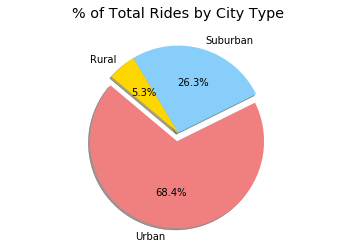

In [48]:
# Save and display the chart

plt.savefig("Total_Rides_by_City_Type.png")
plt.show()

In [49]:
#################################
# % of Total drivers per city type
#################################
 
driver_count = city_csv.groupby(['type'])['driver_count'].sum()

total_drivers = driver_count.loc['Rural'] + driver_count.loc['Suburban'] + driver_count.loc['Urban'] 

 
driver_type_percentage = round(((driver_count/total_drivers)*100),2)
 
# Labels for the sections of our pie chart
labels = ["Urban","Suburban", "Rural"]
 

# The values of each section of the pie chart
sizedriver = [driver_type_percentage.loc['Urban'], driver_type_percentage.loc['Suburban'], driver_type_percentage.loc['Rural'] ]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0, 0)
      

In [50]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Drivers by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal") 

plt.pie(sizedriver, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x11921b240>,
 [Text(0.195082,-1.18404,'Urban'),
  Text(-0.0703722,1.09775,'Suburban'),
  Text(-0.768421,0.787101,'Rural')],
 [Text(0.113798,-0.690688,'77.4%'),
  Text(-0.0383848,0.598771,'19.4%'),
  Text(-0.419139,0.429328,'3.2%')])

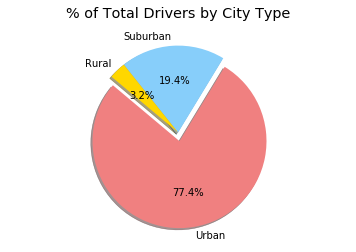

In [51]:
# Save and display the chart

plt.savefig("Total_Drivers_by_City_Type.png")
plt.show()

In [52]:
#################################
# % of Total Cities per city type
#################################
city_count = city_csv.groupby(['type'])['driver_count'].count()
total_city_count = city_count.sum()

 
city_type_percentage = round(((city_count/total_city_count)*100),2)
 
# Labels for the sections of our pie chart
labels = ["Urban","Suburban", "Rural"]
 

# The values of each section of the pie chart
sizecity = [city_type_percentage.loc['Urban'], city_type_percentage.loc['Suburban'], city_type_percentage.loc['Rural'] ]

# The colors of each section of the pie chart
colors = ["lightcoral","lightskyblue", "gold"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0.1, 0, 0)
      

In [53]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('% of Total Cities by City Type')

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.pie(sizecity, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x11d6a8a20>,
 [Text(-0.687605,-0.983463,'Urban'),
  Text(0.960963,0.535304,'Suburban'),
  Text(-0.448813,1.00427,'Rural')],
 [Text(-0.401103,-0.573687,'52.8%'),
  Text(0.524161,0.291984,'32.8%'),
  Text(-0.244807,0.547786,'14.4%')])

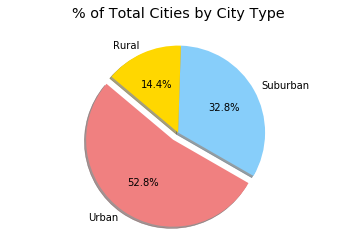

In [54]:
# Save and display the chart

plt.savefig("Total_Cities_by_City_Type.png")
plt.show()